<a href="https://colab.research.google.com/github/hernansalinas/CursoMetodosComputacionales/blob/main/Material_sesiones/ExamenFinal_2024_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación final Métodos computacionales

Profesor: Hernan D. Salinas

Universidad de Antioquia

El examen consta de siete puntos, cada uno con igual valor. Puede utilizar librerías para su solución. La entrega se realiza a través de GitHub. El plazo de entrega es el jueves 8 de agosto a las 11:59 pm. Evite el uso de inteligencia artificial.



En este examen, estudiaremos la caída de un lápiz en posición vertical. El lápiz puede ser modelado como un cuerpo rígido, cuyas ecuaciones de movimiento respecto a su centro de masa pueden ser expresadas de la siguiente manera, de acuerdo con la imagen mostrada en la figura:



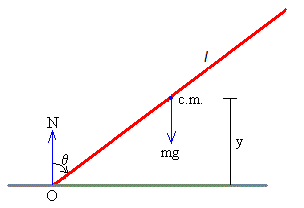


## Ecuaciones de movimiento

### Ecuaciones de movimiento del centro de masa

De acuerdo con la segunda ley de Newton, la ecuación de movimiento a lo largo de la vertical ($y$) puede ser escrita como:

\begin{equation}
m\frac{d^2y}{dt^2} = N - mg
\end{equation}

donde $m$ es la masa de la lápiz, $N$ es la fuerza normal y $g$ es la aceleración de la gravedad. Escribiendo las ecuaciones en términos del ángulo $\theta$, tenemos que:

\begin{equation}
-m\frac{l}{2}\cos \theta \left(\frac{d\theta}{dt} \right)^2 - m\frac{l}{2}\sin \theta \frac{d^2\theta}{dt^2} = N - mg
\end{equation}

### Ecuaciones de rotación del centro de masa

La sumatoria de momentos de fuerza se puede escribir como sigue:

\begin{equation}
I_c\frac{d^2\theta}{dt^2} = N\frac{l}{2} \sin \theta
\end{equation}

donde $I_c = \frac{1}{12}ml^2$ es el momento de inercia de una lápiz de masa $m$ y longitud $l$ respecto a un eje perpendicular a la lápiz en su centro de masa.

Reemplazando el valor de la normal en la ecuación anterior, obtenemos que la ecuación de movimiento para la posición angular está dada por:

\begin{equation}
\frac{d^2 \theta}{dt^2} = \left( \frac{\frac{2g}{l} - \left(\frac{d\theta}{dt}\right)^2\cos \theta }{\frac{1}{3} + \sin^2 \theta} \right)\sin \theta
\end{equation}

Podemos resolver la ecuación anterior si conocemos las condiciones iniciales: $\theta = \theta_0$ en $t = 0$ y $\frac{d\theta}{dt} = \omega_0 = 0$.

Su tarea en este examen será modelar el movimiento de caída del lápiz. Para ello, asuma que la longitud del lápiz es:

$L = 0.1$ m, $g = 9.8$ m/s² y realice lo siguiente:

1. Utilizando `odeint`, encuentre la solución a la ecuación diferencial para obtener: la posición angular $\theta$, la posición del centro de masa $y = \frac{l}{2}\cos \theta$ y la rapidez angular como función del tiempo, asumiendo que $\theta_0 = \pi/12$, $\omega_0 = 0$.

   Nota: El lápiz llega al piso cuando el ángulo es $\theta = \pi/2$.

2. Empleando `matplotlib`, construya tres gráficos con la información del punto anterior, asegurándose de que tengan las unidades respectivas.

3. Con el programa construido en los puntos 1 y 2, analice el efecto del paso del tiempo en la posición angular, la posición del centro de masa y la rapidez angular. Aproximadamente, ¿a partir de qué tiempo la solución puede ser considerada válida?

4. Con el paso del tiempo calibrado, construya cuatro curvas en una misma figura de la posición angular como función del tiempo, para ángulos iniciales de caída de: $\theta_0 = \pi/12$, $\theta_0 = \pi/6$, $\theta_0 = \pi/4$, $\theta_0 = \pi/3$ y $\omega_0 = 0$.

5. Con los resultados obtenidos, realice una interpolación para cada figura del inciso anterior y encuentre el tiempo de caída, empleando algún método conocido de raíces.

6. El Tiempo que tarda el lápiz en caer $T$, puede ser deducido de la ecuación de conservación de la energía, el cual viene dado por la siguiente integral:  


\begin{equation}
T = \frac{1}{2}\sqrt{\frac{l}{g}} \int_{\theta_0}^{\pi/2} \sqrt{\frac{1/3 + \sin^2 \theta}{\cos \theta_0 - \cos \theta}} \, \mathrm{d}\theta
\end{equation}

Valide sus soluciones del tiempo de caída utilizando la siguiente ecuación.

7. Finalmente, realice un gráfico de $T$ como función de $\theta_0$. ¿Qué puede concluir?


**Referencias**: Para más detalle de los cálulos ver:

1. Crawford F. S. Problem: Moments to remember. Am. J. Phys. 57 (2) February 1989, pp. 105, solución 177
2. http://www.sc.ehu.es/sbweb/fisica3/solido/lapiz/lapiz.html

1. Utilizando `odeint`, encuentre la solución a la ecuación diferencial para obtener: la posición angular $\theta$, la posición del centro de masa $y = \frac{l}{2}\cos \theta$ y la rapidez angular como función del tiempo, asumiendo que $\theta_0 = \pi/12$, $\omega_0 = 0$.

   Nota: El lápiz llega al piso cuando el ángulo es $\theta = \pi/2$.

In [25]:
import numpy as np
import pandas as pd
from scipy import optimize
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import odeint
from scipy.interpolate import interp1d
from scipy.interpolate import lagrange, CubicSpline

In [26]:
#Parámetros
l=0.1 #longitud del lapiz (m)
g=9.8  #m/s^2
theta_0=np.pi/12 #radianes
omega_0=0
y0=[theta_0, omega_0] #condiciones iniciales
t = np.linspace(0, 10, 1000)  #tiempo

#Función de la ecuación de movimiento para la posición angular
def fun(y,t):
  theta,omega=y  # y es un vector tal que θ=y[0] and ω=y[1]
  d1=(2*g/l)-omega**2*np.cos(theta)
  d2=(1/3+np.sin(theta)**2)
  d3=np.sin(theta)
  dydt=[omega,(d1/d2)*d3]  #dθ/dt, dθ^2/dt^2
  return dydt

In [27]:
#solución de la edo
sol=odeint(fun,y0,t)  #sol es un vector tal que sol[0]=θ(t) y sol[1]=ω(t)
theta=sol[:,0]
omega=sol[:,1]
print(sol)

[[ 0.26179939  0.        ]
 [ 0.2681562   1.27168653]
 [ 0.28731699  2.56052611]
 ...
 [ 0.84100672 11.48747624]
 [ 0.96047684 12.3786979 ]
 [ 1.08882627 13.26949409]]


In [28]:
y=(l/2)*np.cos(theta) #posición del centro de masa
print(y)

[ 0.04829629  0.04821305  0.04795038  0.04746963  0.04670784  0.04558204
  0.04399752  0.04185896  0.03908102  0.03559512  0.03135146  0.02631788
  0.02047759  0.01382747  0.00637815 -0.00184297 -0.01078308 -0.0203423
 -0.03031449 -0.04018804 -0.04824931 -0.04898593 -0.04152961 -0.03175722
 -0.02175551 -0.0121205  -0.00308381  0.00524455  0.01280681  0.01957265
  0.02552931  0.030678    0.03503346  0.03862551  0.0415013   0.04372674
  0.04538507  0.04657075  0.04737931  0.047896    0.04818701  0.04829461
  0.04823546  0.04800033  0.04755421  0.04683748  0.0457696   0.04425691
  0.04220347  0.03952198  0.03614122  0.03200872  0.02708992  0.02136595
  0.01483178  0.00749597 -0.00061684 -0.00945839 -0.01893782 -0.02887099
 -0.03881595 -0.04736041 -0.04954059 -0.04283232 -0.03319723 -0.02317695
 -0.01347061 -0.0043395   0.00409495  0.01176955  0.01865087  0.02472395
  0.02998806  0.03445595  0.03815514  0.04113015  0.0434442   0.04517831
  0.04642588  0.04728299  0.047837    0.04815722  0.

2. Empleando `matplotlib`, construya tres gráficos con la información del punto anterior, asegurándose de que tengan las unidades respectivas.


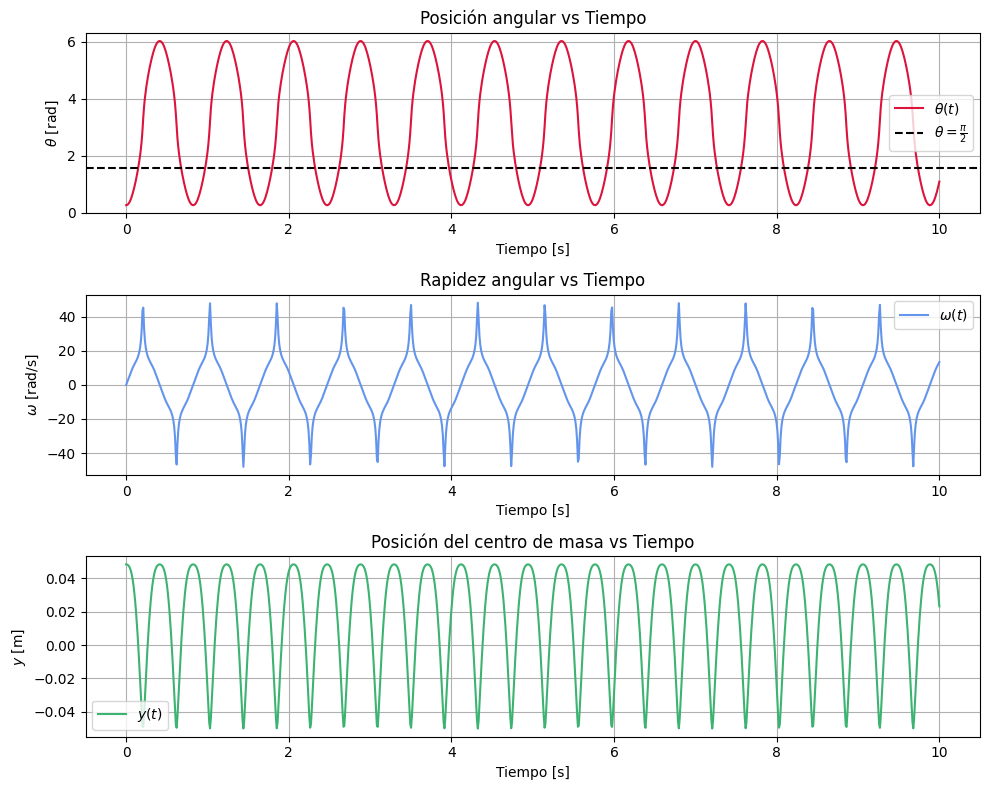

In [6]:
plt.figure(figsize=(10,8))

#Posiciin angular(θ) vs tiempo
plt.subplot(3,1,1)
plt.plot(t,theta,color='crimson', label=r'$\theta(t)$')
plt.axhline(np.pi/2,color='k', linestyle='--', label=r'$\theta = \frac{\pi}{2}$')
plt.xlabel('Tiempo [s]')
plt.ylabel(r'$\theta$ [rad]')
plt.title('Posición angular vs Tiempo')
plt.grid(True)
plt.legend()

#rapidez angular(ω) vs tiempo
plt.subplot(3, 1, 2)
plt.plot(t, omega,color='cornflowerblue', label=r'$\omega(t)$')
plt.xlabel('Tiempo [s]')
plt.ylabel(r'$\omega$ [rad/s]')
plt.title('Rapidez angular vs Tiempo')
plt.grid(True)
plt.legend()

#Posición del centro de masa(y) vs tiempo
plt.subplot(3, 1, 3)
plt.plot(t, y,color='mediumseagreen', label=r'$y(t)$')
plt.xlabel('Tiempo [s]')
plt.ylabel(r'$y$ [m]')
plt.title('Posición del centro de masa vs Tiempo')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

3. Con el programa construido en los puntos 1 y 2, analice el efecto del paso del tiempo en la posición angular, la posición del centro de masa y la rapidez angular. Aproximadamente, ¿a partir de qué tiempo la solución puede ser considerada válida?

Veamos en qué momento la posición del centro de masa llega a cero para determinar el tiempo de caída. (Esto es equivalente a que el angulosea $θ=\frac{π}{2}$  que es cuando el láiz llega al piso).
Hasta ese punto la solución será válida pues será el tiempo en el cual el lápiz choque con el piso, tiempos superiores a ese valor no tienen sentido físico.



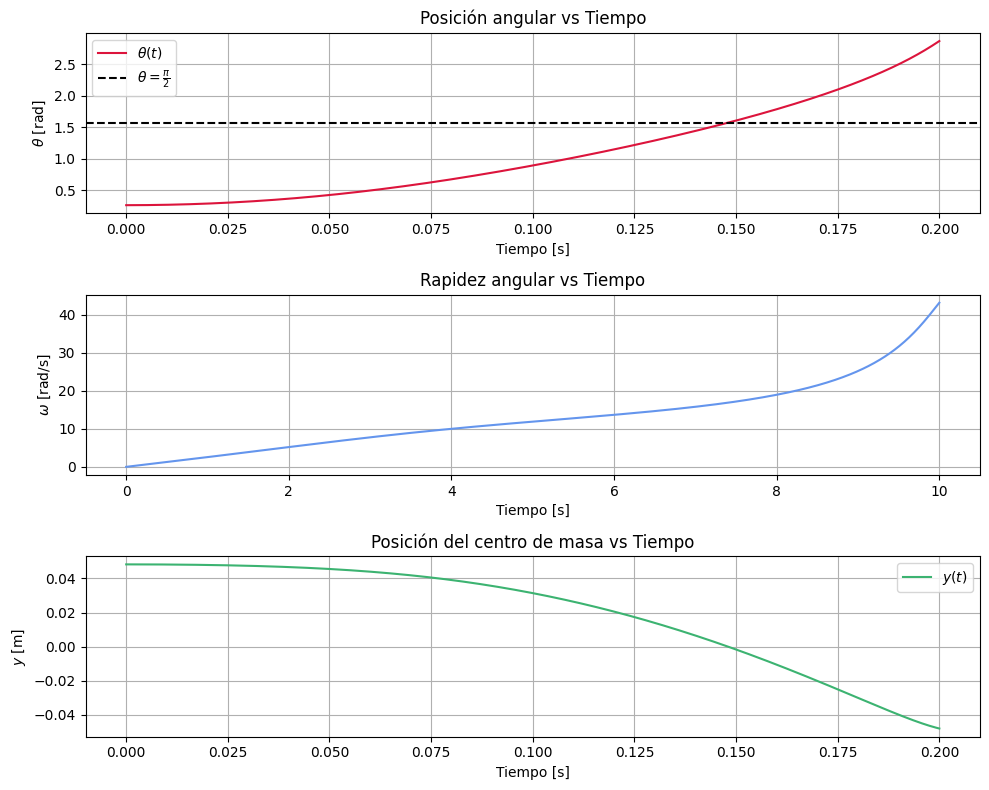

In [38]:
t0 = np.linspace(0, 0.2, 1000)  #disminuimos el tiempo del sistema para analizar mejor el tiempo de choque
sol=odeint(fun,y0,t0)
theta=sol[:,0]
omega=sol[:,1]
y=(l/2)*np.cos(theta) #posición del centro de masa
plt.figure(figsize=(10,8))

plt.subplot(3,1,1)
plt.plot(t0,theta,color='crimson', label=r'$\theta(t)$')
plt.axhline(np.pi/2,color='k', linestyle='--', label=r'$\theta = \frac{\pi}{2}$')
plt.xlabel('Tiempo [s]')
plt.ylabel(r'$\theta$ [rad]')
plt.title('Posición angular vs Tiempo')
plt.grid(True)
plt.legend()
plt.subplot(3, 1, 2)
plt.plot(t, omega,color='cornflowerblue', label=r'$\omega(t)$')
plt.xlabel('Tiempo [s]')
plt.ylabel(r'$\omega$ [rad/s]')
plt.title('Rapidez angular vs Tiempo')
plt.grid(True)
plt.subplot(3, 1, 3)
plt.plot(t0, y,color='mediumseagreen', label=r'$y(t)$')
plt.xlabel('Tiempo [s]')
plt.ylabel(r'$y$ [m]')
plt.title('Posición del centro de masa vs Tiempo')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Vemos que el lápiz llega al piso aproximadamente a los 0.145 segundos (punto en el cual se corta la gráficas de centro de masa con el origen y la gráfica de posición angular con $\frac{π}{2}$).

Encontremos un valor más exacto de este tiempo usando pandas

In [8]:
t0 = np.linspace(0, 0.5, 1000)
y=(l/2)*np.cos(theta)
d={'Tiempo':t0,'Función':y}#serie
df=pd.DataFrame(d)  #data frame
#encontrar las raíces de la función
#dentro del dataframe se puede hacer un filro para buscar los valores cercanos al cero
df_filtro=df[df.Tiempo.between(0.14,0.15)] #sé que entre los valores del tiempo de 0.14 y 0.15 está la raíz de la función del centro de masa
df_filtro

,Tiempo,Función
280,0.140140,0.044693
281,0.140641,0.044660
282,0.141141,0.044627
283,0.141642,0.044594
284,0.142142,0.044560
285,0.142643,0.044527
286,0.143143,0.044493
287,0.143644,0.044459
288,0.144144,0.044425
289,0.144645,0.044390


Vemos que la función cambia de signo cuando el tiempo es 0.148148 s, es decir que la solución se puede considerar válida hasta valores cercanos a 0.1481segundos que es el tiempo en el cual el lápiz llega al suelo.

4. Con el paso del tiempo calibrado, construya cuatro curvas en una misma figura de la posición angular como función del tiempo, para ángulos iniciales de caída de: $\theta_0 = \pi/12$, $\theta_0 = \pi/6$, $\theta_0 = \pi/4$, $\theta_0 = \pi/3$ y $\omega_0 = 0$.

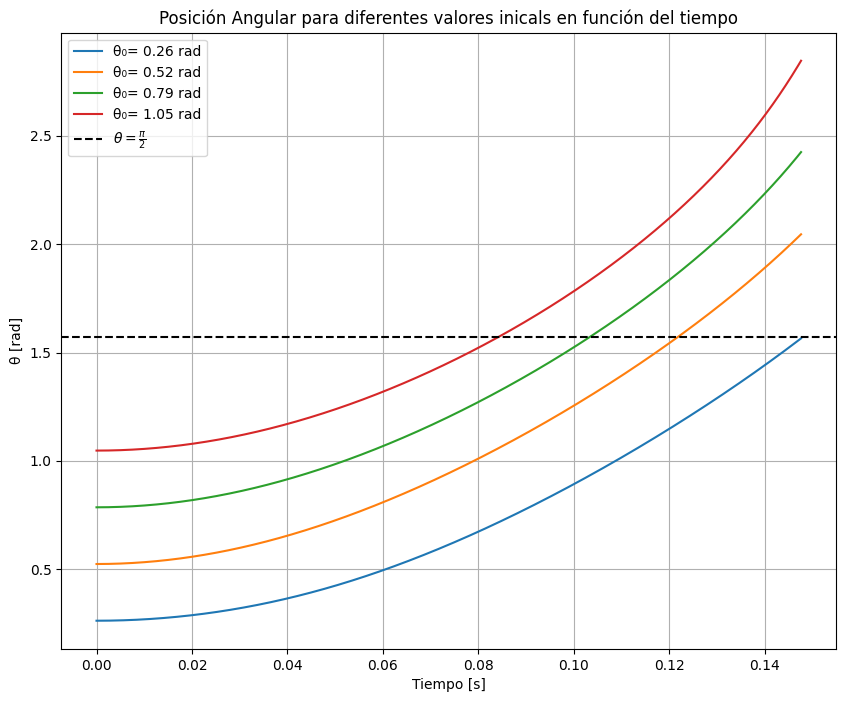

In [9]:
theta_i= [np.pi/12,np.pi/6,np.pi/4,np.pi/3]
omega_i=0
t=np.linspace(0,0.14765,1000)  #sabemos que el tiempo máximo valido es aproximadamente 0.148s

plt.figure(figsize=(10, 8))
for theta in theta_i: #vario para los diferentes valores de la posición inicial
  y0=[theta,omega_i] #vector (theta, omega)
  sol=odeint(fun, y0, t)
  theta_t=sol[:,0]
  plt.plot(t,theta_t,label=f'θ₀={theta:.2f} rad')  #gráfica para los diferentes valores de theta

plt.axhline(np.pi/2,color='k',linestyle='--',label=r'$\theta = \frac{\pi}{2}$')  #línea vertical que indica el suelo
plt.xlabel('Tiempo [s]')
plt.ylabel('θ [rad]')
plt.title('Posición Angular para diferentes valores inicals en función del tiempo')
plt.legend()
plt.grid(True)
plt.show()


5. Con los resultados obtenidos, realice una interpolación para cada figura del inciso anterior y encuentre el tiempo de caída, empleando algún método conocido de raíces.

Para θ₀=0.26 rad, el tiempo de caída es: 0.14798323624841397 s
Para θ₀=0.52 rad, el tiempo de caída es: 0.12177877390355472 s
Para θ₀=0.79 rad, el tiempo de caída es: 0.10332124452947634 s
Para θ₀=1.05 rad, el tiempo de caída es: 0.08416005017133939 s


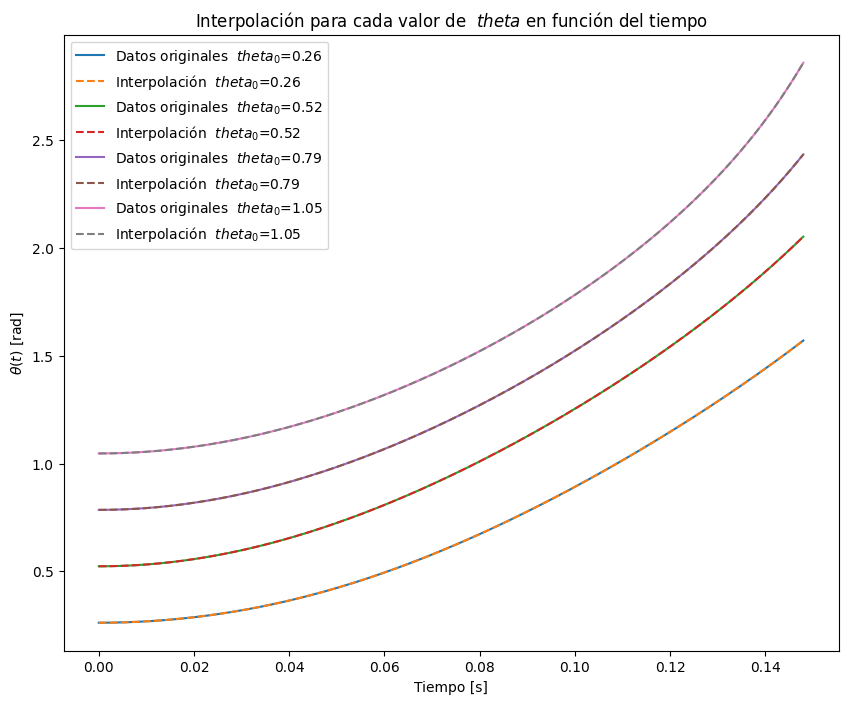

In [39]:
#a medida que el ángulo es más pequeño, el timepo de caída es menor, por tanto el tiempo mayor calibrado será 0.14765, el cual corresponde al ángulo de pi/12
theta_i=[np.pi/12,np.pi/6,np.pi/4,np.pi/3]
t=np.linspace(0,0.1480,1000)  # Intervalo de tiempo

plt.figure(figsize=(10, 8))
for theta in theta_i: #vario para los diferentes valores de la posición inicial
  y0=[theta, omega_i]  #vector (theta, omega)
  sol=odeint(fun, y0, t)  #solución de la ecuación diferencial
  theta_t=sol[:,0]
  spline=interp1d(t,theta_t,kind='cubic',fill_value="extrapolate")  #me extiendo más allá del rango
  def f(t):
    return spline(t)-np.pi/2 #dif entre el valor interpolado y pi/2 con el fin de encontrar el timepo en el que theta llega a pi/2 (el cual es justamente el punto en el que el lapiz llega l piso)
  t_caida = optimize.newton(f,0.1)  #uso el método de newton para encontrar raices, sé que las raices están aproximadamente cerca de 0.1 por lo que tomo este como mi punto de partida
  print(f"Para θ₀={theta:.2f} rad, el tiempo de caída es: {t_caida} s")
  plt.plot(t,theta_t, '-',label=f'Datos originales $\ theta_0$={theta:.2f}')  #comparación de la grafica con los valores originales y la gráifca mediante spline cubics
  plt.plot(t,spline(t),'--',label=f'Interpolación $\ theta_0$={theta:.2f}')

plt.xlabel('Tiempo [s]')
plt.ylabel(r'$\theta(t)$ [rad]')
plt.legend()
plt.title('Interpolación para cada valor de $\ theta$ en función del tiempo')
plt.show()

Como era de esperarse a menor posición angular, menor es el tiempo en que se tarde caer el objeto.

6. El Tiempo que tarda el lápiz en caer $T$, puede ser deducido de la ecuación de conservación de la energía, el cual viene dado por la siguiente integral:  


\begin{equation}
T = \frac{1}{2}\sqrt{\frac{l}{g}} \int_{\theta_0}^{\pi/2} \sqrt{\frac{1/3 + \sin^2 \theta}{\cos \theta_0 - \cos \theta}} \, \mathrm{d}\theta
\end{equation}

Valide sus soluciones del tiempo de caída utilizando la siguiente ecuación.

In [17]:
theta_0 = np.pi / 12  # ángulo inicial en radianes

def integrando(theta, theta_0):  #función a integrar
  return np.sqrt((1/3+np.sin(theta)**2)/(np.cos(theta_0)-np.cos(theta)))

I=quad(integrando, theta_0, np.pi/2, args=(theta_0,))[0]  #calculamos la integral usando el método de cuadratura

T=0.5*np.sqrt(l/g)*I #tiempo de cáida
print(f"El tiempo de caída para theta0=pi/12 es: {T:.4f} s")


El tiempo de caída para theta0=pi/12 es: 0.1480 s


7. Finalmente, realice un gráfico de $T$ como función de $\theta_0$. ¿Qué puede concluir?

Para θ₀=0.26, el tiempo que se demora en caer es: 0.1479832354352146 s
Para θ₀=0.52, el tiempo que se demora en caer es: 0.12177877486181128 s
Para θ₀=0.79, el tiempo que se demora en caer es: 0.10332124464084698 s
Para θ₀=1.05, el tiempo que se demora en caer es: 0.08416005040768007 s


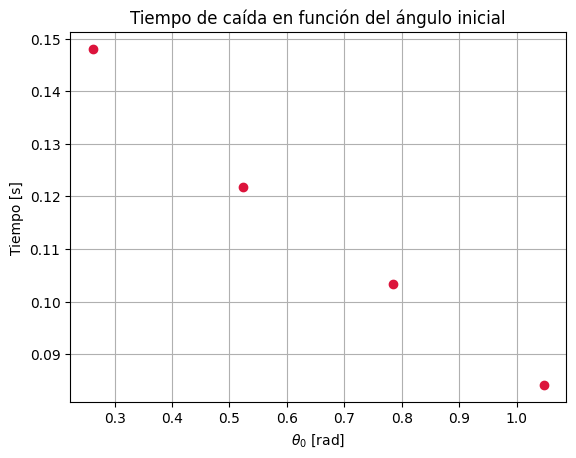

In [37]:
theta_i=[np.pi/12,np.pi/6,np.pi/4,np.pi/3]  #variando los ángulos de caida
T= np.zeros_like(theta_i)

for i, theta_0 in enumerate(theta_i):  #calculo el tiempo de caída para cada angulo incial
  I= quad(integrando,theta_0,np.pi/2,args=(theta_0,))[0] #integral
  T[i] = 0.5*np.sqrt(l/g)*I #tiempo de caída
  print(f"Para θ₀={theta_0:.2f}, el tiempo que se demora en caer es: {T[i]} s")

plt.plot(theta_i,T,'o',color='crimson')
plt.xlabel(r'$\theta_0$ [rad]')
plt.ylabel('Tiempo [s]')
plt.title('Tiempo de caída en función del ángulo inicial')
plt.grid(True)
plt.show()

Según la gráfica vemos que la dinámica de la caída del lápiz no solo depende de la gravedad, sino también de la inclinación inicial del objeto. Vemos que si el ángulo inicial es pequeño, la gravedad tiene una mayor componente efectiva que tira del lápiz hacia abajo, resultando en un tiempo de caída más corto. Este resultado concuerda con la intuición física: cuanto más cerca está el lápiz de la posición horizontal al inicio, más rápido cae al suelo.